<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLMGAG" data-toc-modified-id="LLMGAG-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLMGAG</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Re-run-with-updated-eggnog-mapper-(v2)" data-toc-modified-id="Re-run-with-updated-eggnog-mapper-(v2)-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Re-run with updated eggnog-mapper (v2)</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-genes-assembled-&amp;-clustered" data-toc-modified-id="Number-of-genes-assembled-&amp;-clustered-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Number of genes assembled &amp; clustered</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Taxonomy</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>COG functional categories</a></span><ul class="toc-item"><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-5.3.1.1"><span class="toc-item-num">5.3.1.1&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li><li><span><a href="#KEGG-pathway" data-toc-modified-id="KEGG-pathway-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>KEGG pathway</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-5.3.2.1"><span class="toc-item-num">5.3.2.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li><li><span><a href="#CAZy" data-toc-modified-id="CAZy-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>CAZy</a></span><ul class="toc-item"><li><span><a href="#By-Taxonomy" data-toc-modified-id="By-Taxonomy-5.3.3.1"><span class="toc-item-num">5.3.3.1&nbsp;&nbsp;</span>By Taxonomy</a></span></li></ul></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-taxonomy" data-toc-modified-id="By-taxonomy-5.4.1.1"><span class="toc-item-num">5.4.1.1&nbsp;&nbsp;</span>By taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Run `LLMGAG` (metagenome assembly of genes) pipeline on animal gut microbiome metagenome study
* study = PRJEB11755
  * host = pig

# Var

In [53]:
studyID = 'PRJEB11755'
base_dir = file.path('/ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/',
                     studyID)
tmp_out_dir = file.path('/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl/',
                        studyID)

work_dir = file.path(base_dir, 'LLMGAG')

pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llmgag/'
threads = 24

# Init

In [54]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
set.seed(8304)

source('/ebio/abt3_projects/Georg_animal_feces/code/misc_r_functions/init.R')

In [55]:
make_dir(base_dir)
make_dir(tmp_out_dir)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJEB11755 
Directory already exists: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/multi-study_MG-asmbl//PRJEB11755 
Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects//PRJEB11755/LLMGAG 


# LLMGAG

## Setup

In [4]:
cat_file(file.path(work_dir, 'config.yaml'))

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB11755/LLMGAG/samples_n100.txt

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB11755/LLMGAG/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog.db
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_diamond_db: /ebio/abt3_projects/databases_no-backup/humann2/uniref50/uniref50_annota

### Run

```{bash}
(snakemake_dev) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmgag
$ screen -L -S llmgag-PRJEB11755 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB11755/LLMGAG/config.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB11755/LLMGAG/SGE_log 24
```

In [9]:
pipelineInfo(pipeline_dir)

LLMGAG

Ley Lab Metagenome Assembly of Genes (LLMGAG)

* Version: 0.1.3
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/annotate.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- pigz
- bioconda::fasta-splitter
- bioconda::eggnog-mapper

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/checkm.yaml <==
channels: !!python/tuple
- bioconda
dependencies:
- python=2
- pigz
- bioconda::prodigal
- bioconda::pplacer
- bioconda::checkm-genome

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/das_tool.yaml <==
channels: !!python/tuple
- r
- bioconda
dependencies:
- pigz
- ruby
- r::r-base
- r::r-data.table
- r::r-domc
- r::r-ggplot2
- bioconda::pullseq
- bioconda::prodigal
- bioconda::blast
- bioconda::diamond
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgag//bin/envs/dask.yaml <==
channels: !!python/tuple
- co

### Re-run with updated eggnog-mapper (v2)

In [5]:
cat_file(file.path(work_dir, 'config.yaml'))

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB11755/LLMGAG/samples_n100.txt

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB11755/LLMGAG/

#-- database --#
## eggnog mapper
eggnog_diamond_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog_proteins.dmnd
eggnog_db: /ebio/abt3_projects/databases_no-backup/Eggnog/v2/eggnog.db
## mmseqs taxonomy
mmseqs_tax_db: /ebio/abt3_projects/databases_no-backup/uniclust/uniclust50/uniclust50_2018_08_consensus
## checkM
checkM_data: /ebio/abt3_projects/databases_no-backup/checkM/
## sourmash
sourmash_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.sbt.json
sourmash_lca_db: /ebio/abt3_projects/databases_no-backup/sourmash/genbank-k31.lca.json.gz
# humann2 diamond
humann2_diamond_db: /ebio/abt3_projects/databases_no-backup/humann2/uniref50/uniref50_annota

**RUN**

```
(snakemake_dev) @ rick:/ebio/abt3_projects/methanogen_host_evo/bin/llmgag
$ screen -L -S llmgag-PRJEB11755 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB11755/LLMGAG/config.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/multi-study/BioProjects/PRJEB11755/LLMGAG/SGE_log 24
```

# Summary

## Number of genes assembled & clustered

In [5]:
F = file.path(work_dir, 'assembly', 'plass', 'genes.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_raw_seqs = system(cmd, intern=TRUE)
cat('Number of assembled sequences:', n_raw_seqs, '\n')

Number of assembled sequences: 1084240 


In [6]:
F = file.path(work_dir, 'cluster', 'linclust', 'clusters_rep-seqs.faa')
cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
n_rep_seqs = system(cmd, intern=TRUE)
cat('Number of cluster rep sequences:', n_rep_seqs, '\n')

Number of cluster rep sequences: 877842 


In [7]:
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs.faa.gz')
cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
n_h2_seqs = system(cmd, intern=TRUE)
cat('Number of humann2_db-formatted seqs:', n_h2_seqs, '\n')

Number of humann2_db-formatted seqs: 29093 


## Taxonomy

In [56]:
# reading in taxonomy table
## WARING: slow
F = file.path(work_dir, 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
cmd = glue::glue('gunzip -c {file}', file=F) 
coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
tax = fread(cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
    separate(lineage, levs, sep=':')
tax %>% dfhead

Warning message:
“Expected 7 pieces. Additional pieces discarded in 77671 rows [3, 17, 27, 38, 45, 68, 73, 77, 83, 85, 89, 91, 94, 95, 120, 131, 134, 138, 147, 148, ...].”Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 452662 rows [2, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 20, 21, 23, 24, 25, 29, 30, 31, 33, ...].”

[1] 877842     11


seqID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
0b7b33d7f289446bb54e82f372aa6ed0,2024222,species,Prevotella sp. P5-92,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella sp. P5-92
566bf6d9965f4c7ea11e6a7284fd3269,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
05f8585f011b47ca8f2a03e533de8b70,1262935,species,Prevotella sp. CAG:755,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella sp. CAG


In [57]:
# number of sequences
tax$seqID %>% unique %>% length %>% print

[1] 877842


In [58]:
# which ranks found?
tax$rank %>% table %>% print

.
        class        family         forma         genus       kingdom 
          253           491             3          1014             5 
      no rank         order        phylum       species species group 
       546579          1753          1947        322478             4 
     subclass     subfamily    subkingdom      suborder     subphylum 
            1             8             3             3             6 
   subspecies  superkingdom    superorder      varietas 
          994          2282             1            17 


In [59]:
# number of classifications per seqID
tax %>%
    group_by(seqID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

### Summary

In [60]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(Domain, Phylum) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 185   3


Domain,Phylum,n
Fungi,Ascomycota,481
Fungi,Basidiomycota,95
Fungi,Blastocladiomycota,3


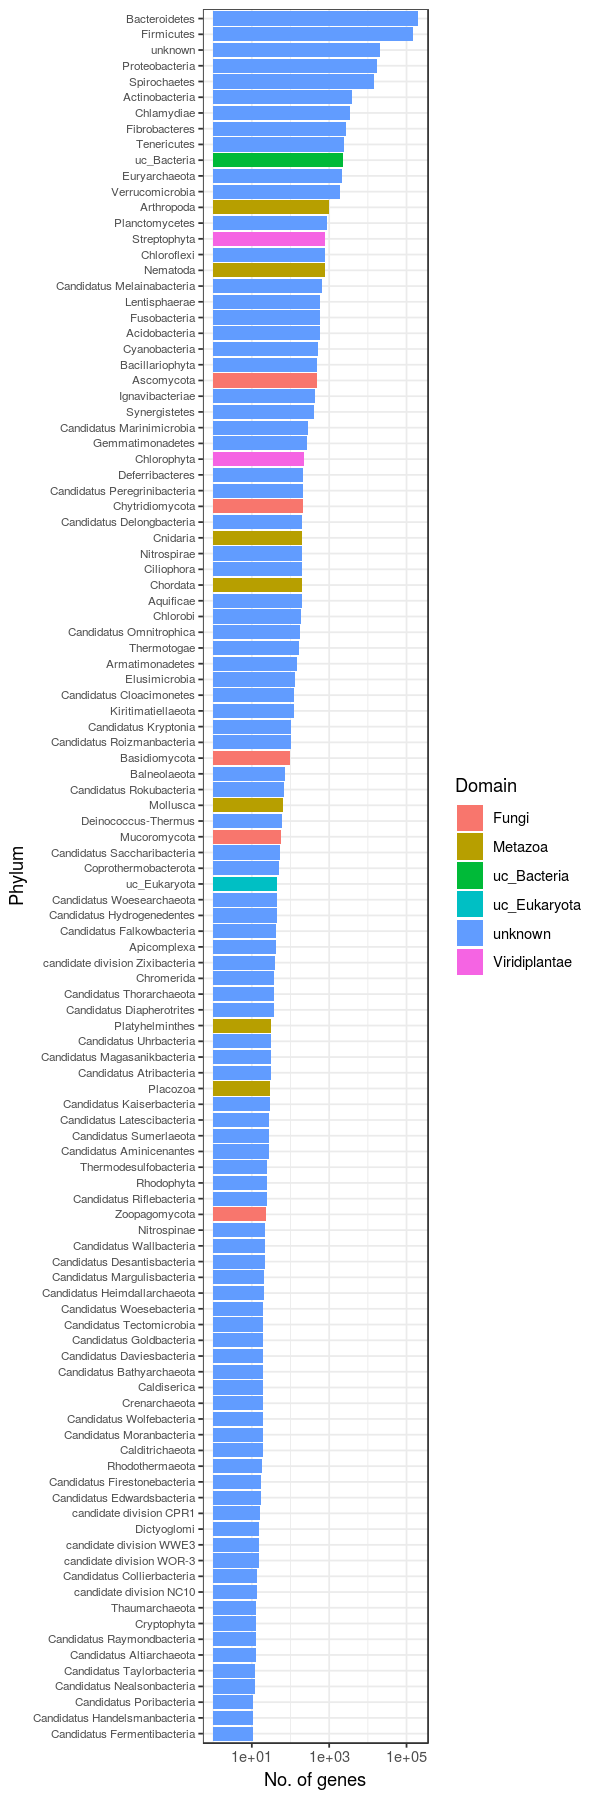

In [61]:
# plotting by phylum
p = tax_s %>%
    filter(n > 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

dims(5,15)
plot(p)

In [62]:
# top phyla
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,n
unknown,Bacteroidetes,196072
unknown,Firmicutes,143275
unknown,unknown,21078
unknown,Proteobacteria,16822
unknown,Spirochaetes,14251
unknown,Actinobacteria,3910
unknown,Chlamydiae,3476
unknown,Fibrobacteres,2796
unknown,Tenericutes,2373
uc_Bacteria,uc_Bacteria,2232


In [63]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '',
           Class != '') %>%
    group_by(Domain, Phylum, Class) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    ungroup() 
 
tax_s %>% dfhead

[1] 359   4


Domain,Phylum,Class,n
Fungi,Ascomycota,Dothideomycetes,43
Fungi,Ascomycota,Eurotiomycetes,103
Fungi,Ascomycota,Lecanoromycetes,3


In [64]:
# top hits
tax_s %>% 
    arrange(-n) %>%
    head(n=30)

Domain,Phylum,Class,n
unknown,Bacteroidetes,Bacteroidia,167621
unknown,Firmicutes,Clostridia,93655
unknown,Firmicutes,Bacilli,21333
unknown,unknown,unknown,20841
unknown,Firmicutes,unknown,16188
unknown,Spirochaetes,Spirochaetia,12738
unknown,Bacteroidetes,unknown,12300
unknown,Bacteroidetes,Flavobacteriia,8291
unknown,Firmicutes,Negativicutes,6532
unknown,Proteobacteria,Gammaproteobacteria,5199


## Annotations

In [65]:
# eggnog-mapper v2
cols = c(
"query_name",
"seed_eggNOG_ortholog",
"seed_ortholog_evalue",
"seed_ortholog_score",
"Predicted_taxonomic_group",
"Predicted_protein_name",
"Gene_Ontology_terms",
"EC_number",
"KEGG_ko",
"KEGG_Pathway",
"KEGG_Module",
"KEGG_Reaction",
"KEGG_rclass",
"BRITE",
"KEGG_TC",
"CAZy",
"BiGG_Reaction",
"tax_scope__eggNOG_taxonomic_level_used_for_annotation",
"eggNOG_OGs",
"bestOG",
"COG_Functional_Category",
"eggNOG_free_text_description"
)

In [66]:
F = file.path(work_dir, 'annotate', 'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
cmd = glue::glue('gunzip -c {file}', file=F, header=FALSE) 
emap_annot = fread(cmd, sep='\t') 
colnames(emap_annot) = cols
emap_annot = emap_annot %>%
    dplyr::select(-Gene_Ontology_terms)
emap_annot %>% dfhead

[1] 341199     21


query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,Predicted_taxonomic_group,Predicted_protein_name,EC_number,KEGG_ko,KEGG_Pathway,KEGG_Module,⋯,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,tax_scope__eggNOG_taxonomic_level_used_for_annotation,eggNOG_OGs,bestOG,COG_Functional_Category,eggNOG_free_text_description
741c5fa4a3994c3584e3dbbb8225ed28,1120968.AUBX01000017_gene1980,3.1e-08,63.9,Cytophagia,,,ko:K03496,,,⋯,,"ko00000,ko03036,ko04812",,,,Bacteria,"47NCJ@768503,4NGFE@976,COG1192@1,COG1192@2",NA|NA|NA,D,Cellulose biosynthesis protein BcsQ
555ce2030c0546ff854584ea59e919a8,439235.Dalk_0766,3.6e-16,90.9,Desulfobacterales,dnaK4,,,,,⋯,,,,,,Bacteria,"1MXX7@1224,2MIBJ@213118,2WKQQ@28221,42NWU@68525,COG0443@1,COG0443@2",NA|NA|NA,O,Belongs to the heat shock protein 70 family
e8267a0eacee4d5d874303b578832b63,1280698.AUJS01000042_gene3291,7.8e-36,156.0,Dorea,,,ko:K07133,,,⋯,,ko00000,,,,Bacteria,"1TP7X@1239,249UX@186801,27W7B@189330,COG1373@1,COG1373@2",NA|NA|NA,S,Domain of unknown function (DUF4143)


In [67]:
# adding taxonomy info
intersect(emap_annot$query_name, tax$seqID) %>% length %>% print

emap_annot = emap_annot %>%
    left_join(tax, c('query_name'='seqID'))

emap_annot %>% dfhead

[1] 341199
[1] 341199     31


query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,Predicted_taxonomic_group,Predicted_protein_name,EC_number,KEGG_ko,KEGG_Pathway,KEGG_Module,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
741c5fa4a3994c3584e3dbbb8225ed28,1120968.AUBX01000017_gene1980,3.1e-08,63.9,Cytophagia,,,ko:K03496,,,⋯,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
555ce2030c0546ff854584ea59e919a8,439235.Dalk_0766,3.6e-16,90.9,Desulfobacterales,dnaK4,,,,,⋯,1852899,species,Lentisphaerae bacterium ADurb.Bin082,unknown,Lentisphaerae,unknown,unknown,unknown,unknown,Lentisphaerae bacterium ADurb.Bin082
e8267a0eacee4d5d874303b578832b63,1280698.AUJS01000042_gene3291,7.8e-36,156.0,Dorea,,,ko:K07133,,,⋯,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA


In [68]:
n_annot_seqs = emap_annot$query_name %>% unique %>% length
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 341199 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [69]:
# summarizing by functional group
max_cat = emap_annot$COG_Functional_Category %>% unique %>% sapply(nchar) %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, COG_Functional_Category) %>%
    separate(COG_Functional_Category, LETTERS[1:max_cat], sep='(?<=[A-Z])') %>%
    gather(X, COG_func_cat, -query_name) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

    
emap_annot_s %>% dfhead

Warning message:
“Expected 5 pieces. Additional pieces discarded in 1 rows [116725].”Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 341188 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 347023      2


query_name,COG_func_cat
741c5fa4a3994c3584e3dbbb8225ed28,D
555ce2030c0546ff854584ea59e919a8,O
e8267a0eacee4d5d874303b578832b63,S


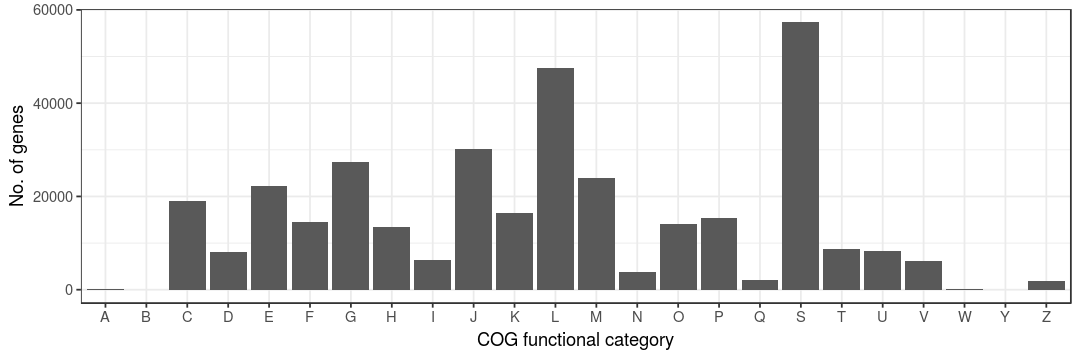

In [70]:
# plotting summary
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,3)
plot(p)

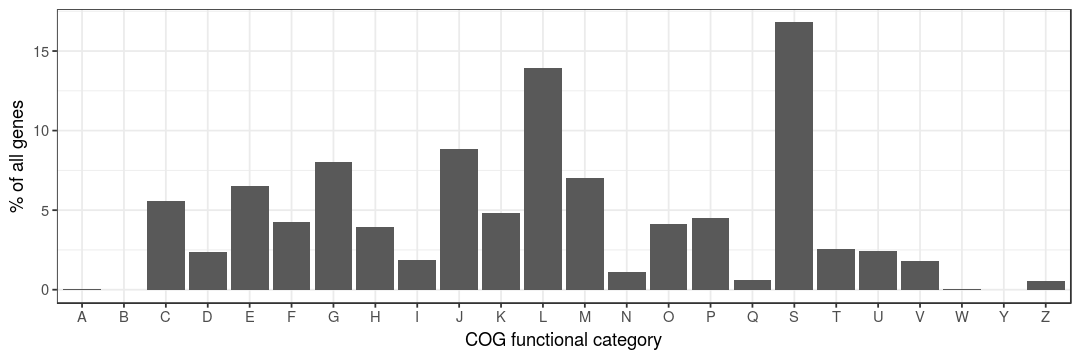

In [71]:
# plotting summary
p = emap_annot_s %>%
    group_by(COG_func_cat) %>%
    summarize(perc_abund = n() / n_annot_seqs * 100) %>%
    ungroup() %>%
    ggplot(aes(COG_func_cat, perc_abund)) +
    geom_bar(stat='identity') +
    labs(x='COG functional category', y='% of all genes') +
    theme_bw() 

dims(9,3)
plot(p)

#### Grouped by taxonomy

In [72]:
max_cat = emap_annot$COG_Functional_Category %>% unique %>% sapply(nchar) %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, COG_Functional_Category) %>%
    separate(COG_Functional_Category, LETTERS[1:max_cat], sep='(?<=[A-Z])') %>%
    gather(X, COG_func_cat, -query_name) %>%
    left_join(tax, c('query_name'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 5 pieces. Additional pieces discarded in 1 rows [116725].”Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 341188 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 347023     12


query_name,COG_func_cat,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
741c5fa4a3994c3584e3dbbb8225ed28,D,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA
555ce2030c0546ff854584ea59e919a8,O,1852899,species,Lentisphaerae bacterium ADurb.Bin082,unknown,Lentisphaerae,unknown,unknown,unknown,unknown,Lentisphaerae bacterium ADurb.Bin082
e8267a0eacee4d5d874303b578832b63,S,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA


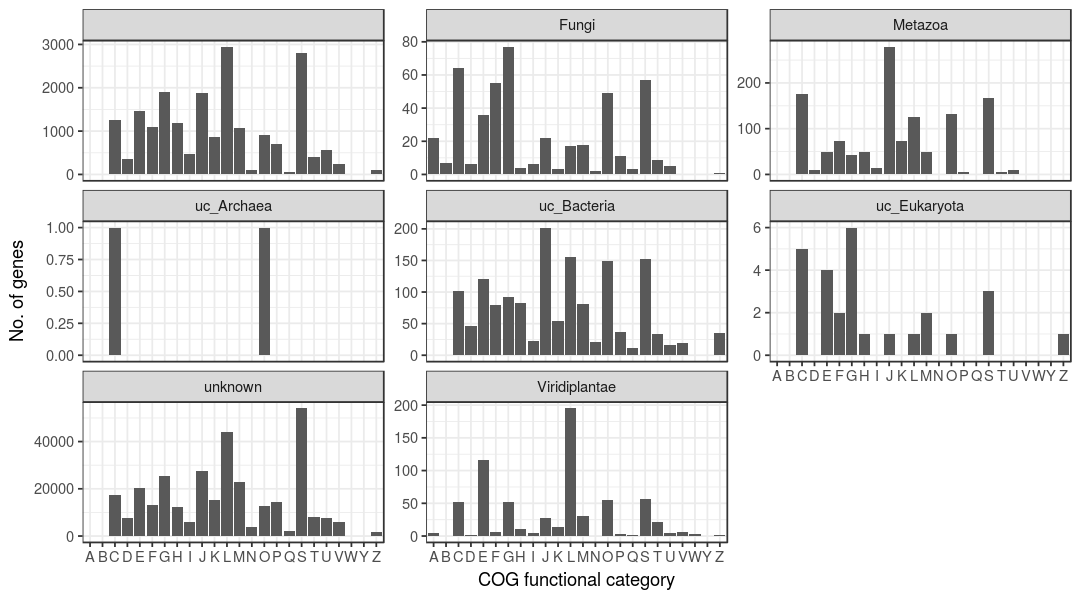

In [73]:
# plotting summary by domain
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    facet_wrap(~ Domain, scales='free_y') +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,5)
plot(p)

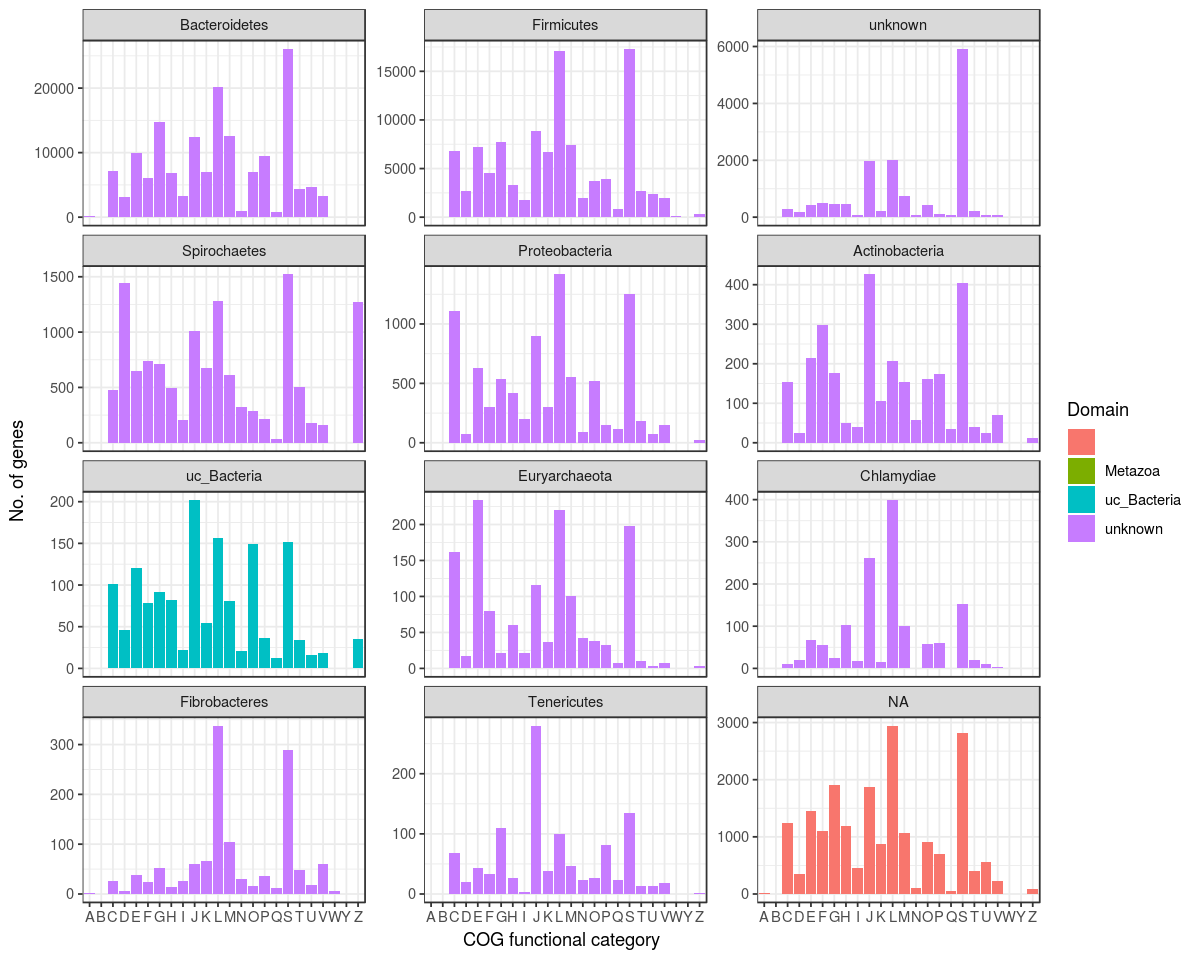

In [74]:
# plotting summary by phylum
p = emap_annot_s %>%
    group_by(Phylum) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n >= 1000) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(COG_func_cat, fill=Domain)) +
    geom_bar() +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(10,8)
plot(p)

### KEGG pathway

In [75]:
# using kegg ptwy mapping file from humann2
ptwy_map_file = '/ebio/abt3_projects/databases_no-backup/humann2/utility_mapping/map_kegg-pwy_name_cat.txt.gz'
cmd = glue::glue('gunzip -c {file}', file=ptwy_map_file)
ptwy_map = fread(cmd, sep='\t', header=FALSE)
colnames(ptwy_map) = c('KEGG_Pathway_ID', 'Level1', 'Level2', 'KEGG_Pathway_Name')
ptwy_map %>% dfhead

[1] 536   4


KEGG_Pathway_ID,Level1,Level2,KEGG_Pathway_Name
ko01100,Metabolism,Global and overview maps,Metabolic pathways Major
ko01110,Metabolism,Global and overview maps,Biosynthesis of secondary metabolites
ko01120,Metabolism,Global and overview maps,Microbial metabolism in diverse environments


In [76]:
# parsing KEGG pathway
max_cat = emap_annot$KEGG_Pathway %>% gsub(',map.+', '', .) %>% 
          unique %>% strsplit(',') %>% lapply(length) %>% unlist %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, KEGG_Pathway) %>%
    mutate(KEGG_Pathway = KEGG_Pathway %>% gsub(',map.+', '', .)) %>%
    separate(KEGG_Pathway, gsub('^', 'X', 1:max_cat), sep=',') %>%
    gather(X, KEGG_Pathway, -query_name) %>%
    filter(!is.na(KEGG_Pathway),
           KEGG_Pathway != '') %>%
    dplyr::select(-X) %>%
    left_join(ptwy_map, c('KEGG_Pathway' = 'KEGG_Pathway_ID'))

emap_annot_s %>% dfhead

Warning message:
“Expected 71 pieces. Missing pieces filled with `NA` in 341198 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 558388      5


query_name,KEGG_Pathway,Level1,Level2,KEGG_Pathway_Name
4be9f0f167d744c0a857d312ff350d10,ko00190,Metabolism,Energy metabolism,Oxidative phosphorylation
443b6302bb02499fb9d233e3ca29b802,ko00860,Metabolism,Metabolism of cofactors and vitamins,Porphyrin and chlorophyll metabolism
1d490fdfb16042e794cb04802160f83f,ko00240,Metabolism,Nucleotide metabolism,Pyrimidine metabolism


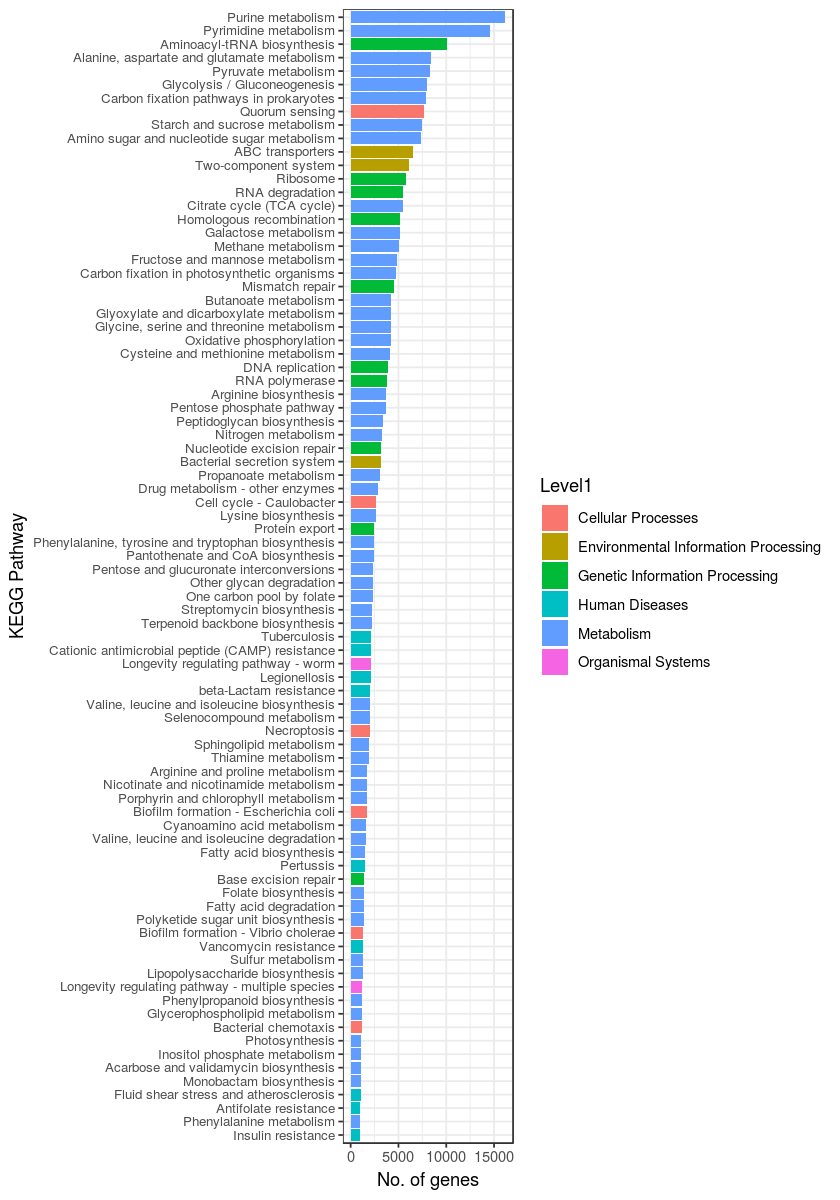

In [77]:
# plotting summary
p = emap_annot_s %>%
    filter(!is.na(KEGG_Pathway_Name),
           KEGG_Pathway_Name != '') %>%
    group_by(Level1, Level2, KEGG_Pathway_Name) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n >= 1000,
           Level2 != 'Global and overview maps') %>%
    mutate(KEGG_Pathway_Name = KEGG_Pathway_Name %>% reorder(n)) %>%
    ggplot(aes(KEGG_Pathway_Name, n, fill=Level1)) +
    geom_bar(stat='identity') +
    labs(x='KEGG Pathway', y='No. of genes') +  
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    ) +
    coord_flip()

dims(7,10)
plot(p)

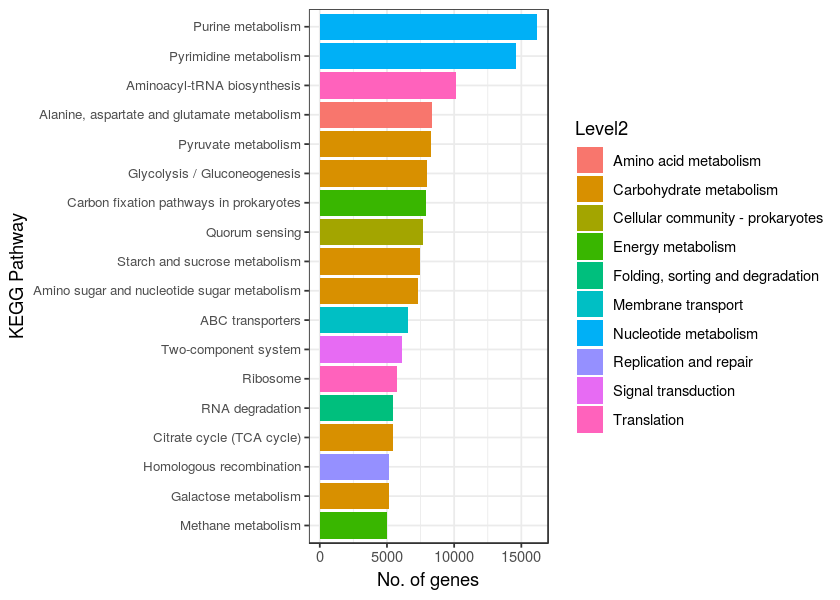

In [78]:
# plotting summary
p = emap_annot_s %>%
    filter(!is.na(KEGG_Pathway_Name),
           KEGG_Pathway_Name != '') %>%
    group_by(Level1, Level2, KEGG_Pathway_Name) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n >= 5000,
           Level2 != 'Global and overview maps') %>%
    mutate(KEGG_Pathway_Name = KEGG_Pathway_Name %>% reorder(n)) %>%
    ggplot(aes(KEGG_Pathway_Name, n, fill=Level2)) +
    geom_bar(stat='identity') +
    labs(x='KEGG Pathway', y='No. of genes') +  
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    ) +
    coord_flip()

dims(7,5)
plot(p)

#### By taxonomy

In [79]:
# parsing KEGG pathway
max_cat = emap_annot$KEGG_Pathway %>% gsub(',map.+', '', .) %>% 
          unique %>% strsplit(',') %>% lapply(length) %>% unlist %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, KEGG_Pathway) %>%
    mutate(KEGG_Pathway = KEGG_Pathway %>% gsub(',map.+', '', .)) %>%
    separate(KEGG_Pathway, gsub('^', 'X', 1:max_cat), sep=',') %>%
    gather(X, KEGG_Pathway, -query_name) %>%
    filter(!is.na(KEGG_Pathway),
           KEGG_Pathway != '') %>%
    dplyr::select(-X) %>%
    left_join(ptwy_map, c('KEGG_Pathway' = 'KEGG_Pathway_ID')) %>%
    left_join(tax, c('query_name'='seqID')) 

emap_annot_s %>% dfhead

Warning message:
“Expected 71 pieces. Missing pieces filled with `NA` in 341198 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 558388     15


query_name,KEGG_Pathway,Level1,Level2,KEGG_Pathway_Name,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
4be9f0f167d744c0a857d312ff350d10,ko00190,Metabolism,Energy metabolism,Oxidative phosphorylation,1081904,no rank,Prevotella pleuritidis F0068,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella pleuritidis
443b6302bb02499fb9d233e3ca29b802,ko00860,Metabolism,Metabolism of cofactors and vitamins,Porphyrin and chlorophyll metabolism,702446,no rank,Bacteroides vulgatus PC510,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides vulgatus
1d490fdfb16042e794cb04802160f83f,ko00240,Metabolism,Nucleotide metabolism,Pyrimidine metabolism,1403932,species,Veillonella sp. DORA_A_3_16_22,unknown,Firmicutes,Negativicutes,Veillonellales,Veillonellaceae,Veillonella,Veillonella sp. DORA_A_3_16_22


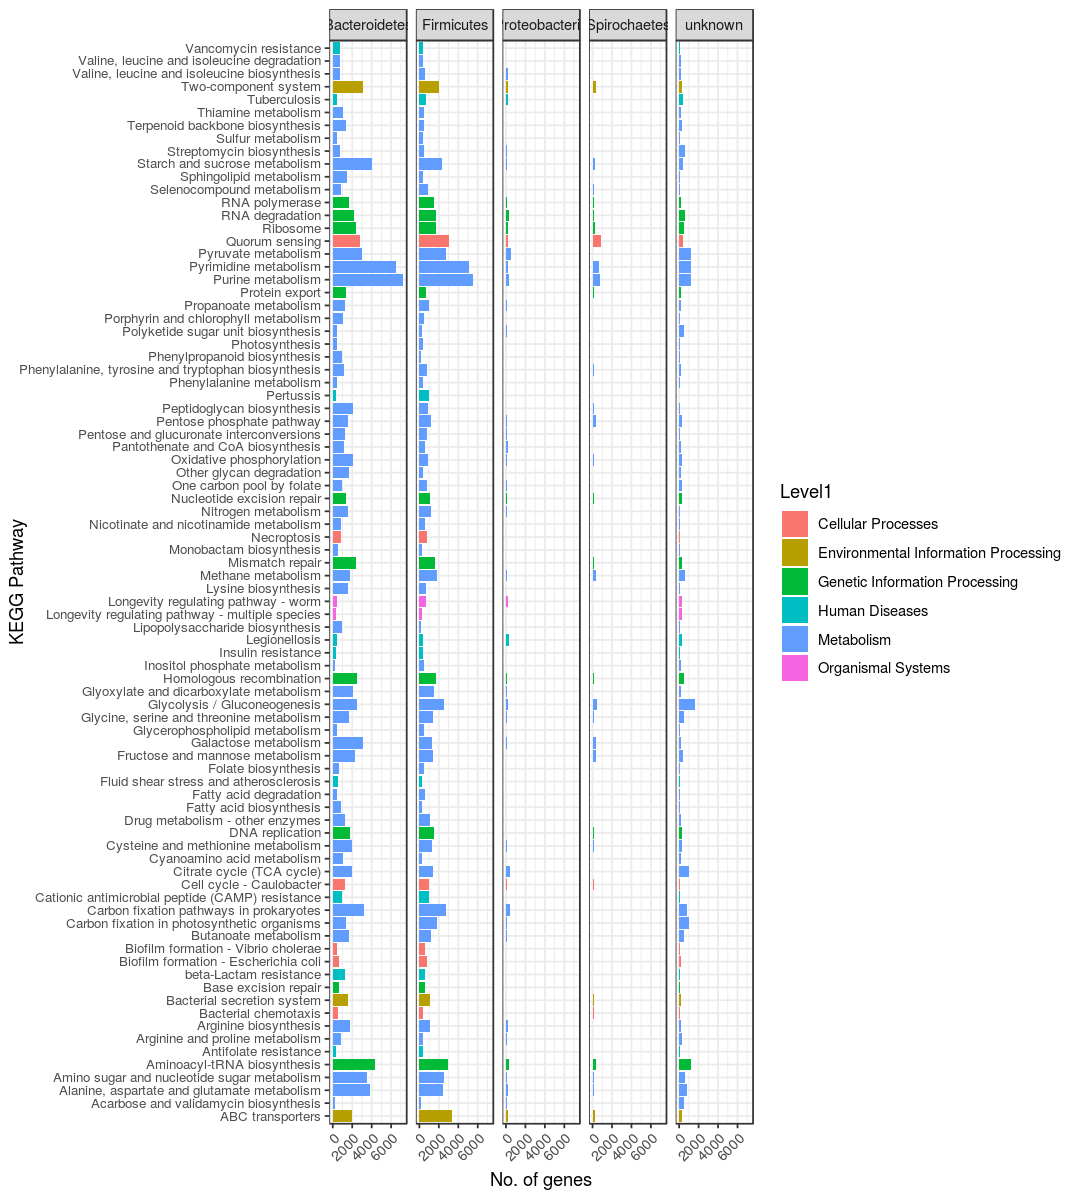

In [94]:
# plotting summary
p = emap_annot_s %>%
    filter(!is.na(KEGG_Pathway_Name),
           KEGG_Pathway_Name != '') %>%
    mutate(Phylum = ifelse(is.na(Phylum), 'unknown', Phylum)) %>%
    group_by(Phylum) %>%
    mutate(n_per_tax = n()) %>%
    ungroup() %>%
    group_by(KEGG_Pathway_Name) %>%
    mutate(n_per_ptwy = n()) %>%
    ungroup() %>%
    filter(n_per_tax >= 10000,
           n_per_ptwy >= 1000) %>%
    group_by(Phylum, Level1, Level2, KEGG_Pathway_Name) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(Level2 != 'Global and overview maps') %>%
    ggplot(aes(KEGG_Pathway_Name, n, fill=Level1)) +
    geom_bar(stat='identity') +
    labs(x='KEGG Pathway', y='No. of genes') +  
    facet_grid(. ~ Phylum) +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

dims(9,10)
plot(p)

### CAZy

In [95]:
# summarizing 
max_cat = emap_annot$CAZy %>% unique %>% strsplit(',') %>% lapply(length) %>% unlist %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, CAZy) %>%
    separate(CAZy, LETTERS[1:max_cat], sep=',') %>%
    gather(X, CAZy, -query_name) %>%
    filter(!is.na(CAZy),
           CAZy != '') %>%
    dplyr::select(-X)  

emap_annot_s %>% dfhead

Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 341198 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 14714     2


query_name,CAZy
b280e1d005c04f308f7417ccddcc139e,GH94
32d806d2255745d9aae2ca393a72e51c,GT36
8d1013db1d47408db6b2472ae6430029,GT51


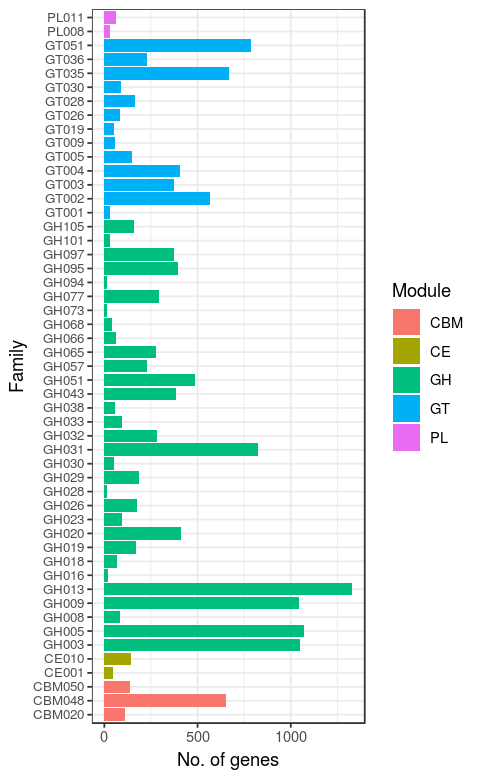

In [96]:
# plotting summary
p = emap_annot_s %>%
    group_by(CAZy) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n >= 10) %>%
    mutate(Module = gsub('[0-9]+$', '', CAZy),
           CAZy = gsub('^([^0-9]+)([0-9])$', '\\10\\2', CAZy),
           CAZy = gsub('^([^0-9]+)([0-9][0-9])$', '\\10\\2', CAZy)) %>%
    ggplot(aes(CAZy, n, fill=Module)) +
    geom_bar(stat='identity') +
    labs(x='Family', y='No. of genes') +  
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8)
    ) +
    coord_flip()

dims(4,6.5)
plot(p)

#### By Taxonomy

In [97]:
# summarizing 
max_cat = emap_annot$CAZy %>% unique %>% strsplit(',') %>% lapply(length) %>% unlist %>% max

emap_annot_s = emap_annot %>%
    dplyr::select(query_name, CAZy) %>%
    separate(CAZy, LETTERS[1:max_cat], sep=',') %>%
    gather(X, CAZy, -query_name) %>%
    filter(!is.na(CAZy),
           CAZy != '') %>%
    dplyr::select(-X) %>%
    left_join(tax, c('query_name'='seqID'))
    
emap_annot_s %>% dfhead

Warning message:
“Expected 5 pieces. Missing pieces filled with `NA` in 341198 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 14714    12


query_name,CAZy,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
b280e1d005c04f308f7417ccddcc139e,GH94,2044939,species,Clostridia bacterium,unknown,Firmicutes,Clostridia,unknown,unknown,unknown,Clostridia bacterium
32d806d2255745d9aae2ca393a72e51c,GT36,1262925,species,Prevotella sp. CAG:386,unknown,Bacteroidetes,Bacteroidia,Bacteroidales,Prevotellaceae,Prevotella,Prevotella sp. CAG
8d1013db1d47408db6b2472ae6430029,GT51,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA


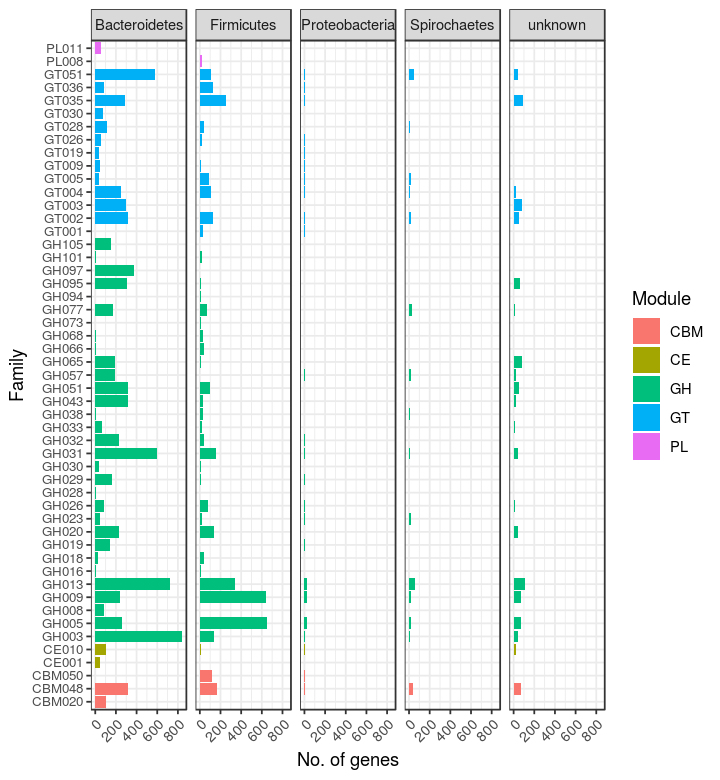

In [103]:
# plotting summary
p = emap_annot_s %>%
    mutate(Phylum = ifelse(is.na(Phylum), 'unknown', Phylum)) %>%
    group_by(Phylum) %>%
    mutate(n_per_tax = n()) %>%
    group_by(CAZy) %>%
    mutate(n_per_CAZy = n()) %>%
    ungroup() %>%
    filter(n_per_tax >= 100,
           n_per_CAZy >= 10) %>%
    group_by(Phylum, CAZy) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    mutate(Module = gsub('[0-9]+$', '', CAZy),
           CAZy = gsub('^([^0-9]+)([0-9])$', '\\10\\2', CAZy),
           CAZy = gsub('^([^0-9]+)([0-9][0-9])$', '\\10\\2', CAZy)) %>%
    ggplot(aes(CAZy, n, fill=Module)) +
    geom_bar(stat='identity') +
    labs(x='Family', y='No. of genes') +  
    facet_grid(. ~ Phylum) +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=8),
        axis.text.x = element_text(angle=45, hjust=1)
    ) +
    coord_flip()

dims(6,6.5)
plot(p)

## humann2 db genes

In [37]:
# gene IDs
F = file.path(work_dir, 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')

hm2 = fread(F, sep='\t', header=TRUE) %>%
    separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
    separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
    separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
    mutate(Genus = gsub('^g__', '', Genus))

hm2 %>% dfhead

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 2854 rows [3, 4, 6, 20, 32, 34, 36, 38, 44, 53, 63, 70, 91, 105, 128, 129, 142, 153, 161, 180, ...].”

[1] 29093     6


original_name,UniRefID,Gene_length,Genus,Species,TaxID
f3e610df303740d2884c28c71212c79e,UniRef50_B6GCC2,89,Streptococcus,Streptococcus_sanguinis,888820
b685d50af12849edab5d1aca1e10e563,UniRef50_W7QHD6,54,Dethiobacter,Dethiobacter_alkaliphilus,555088
fa8140528da14694bdc42db59ebabfa9,UniRef50_X0TCP8,52,unclassified,unclassified,NA


In [38]:
# adding taxonomy
intersect(hm2$original_name, tax$seqID) %>% length %>% print

hm2 = hm2 %>%
    left_join(tax, c('original_name'='seqID'))

hm2 %>% dfhead

[1] 29093
[1] 29093    16


original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
f3e610df303740d2884c28c71212c79e,UniRef50_B6GCC2,89,Streptococcus,Streptococcus_sanguinis,888820,888820,no rank,Streptococcus sanguinis SK1056,unknown,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,Streptococcus sanguinis
b685d50af12849edab5d1aca1e10e563,UniRef50_W7QHD6,54,Dethiobacter,Dethiobacter_alkaliphilus,555088,555088,no rank,Dethiobacter alkaliphilus AHT 1,unknown,Firmicutes,Clostridia,Clostridiales,Syntrophomonadaceae,Dethiobacter,Dethiobacter alkaliphilus
fa8140528da14694bdc42db59ebabfa9,UniRef50_X0TCP8,52,unclassified,unclassified,NA,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA


### Summary

In [39]:
# number of unique UniRef IDs
hm2$UniRefID %>% unique %>% length

[1] 13405

In [40]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    head(n=30)

UniRefID,n
UniRef50_E1KNG8,268
UniRef50_UPI000469E064,204
UniRef50_E1KNG7,201
UniRef50_G6ATV3,171
UniRef50_D4V7Q3,169
UniRef50_B3JFA5,153
UniRef50_U6R9A9,151
UniRef50_A0A016LWM3,137
UniRef50_UPI00046EC615,128
UniRef50_T2XA12,123


In [41]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% nrow 

[1] 26239

#### By taxonomy

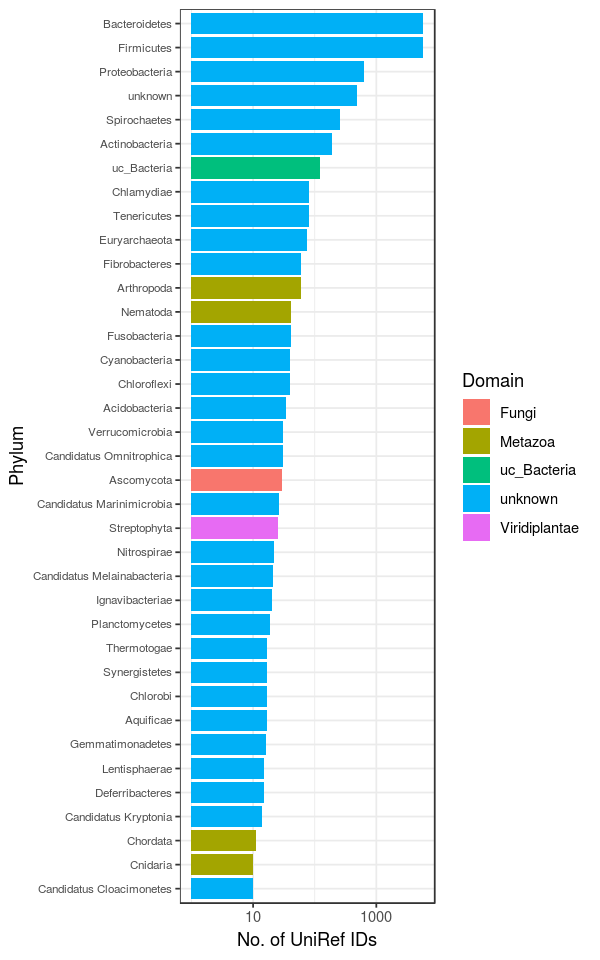

In [44]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = UniRefID %>% unique %>% length) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of UniRef IDs') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )
    
dims(5,8)
plot(p)

# sessionInfo

In [43]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec